In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [6]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11699801061745531034,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1406107238
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8770033935571921868
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# channel_first, channel_last

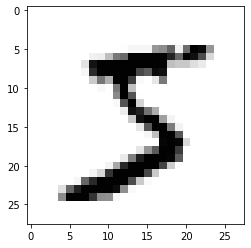

In [9]:
%matplotlib inline

first_image = x_train[0,:,:]
plt.imshow(first_image, cmap=plt.cm.Greys)

In [26]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩 (재정의)
    def on_train_begin(self, logs={}): # 훈련시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
         callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 55s 919us/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 2/12
60000/60000 [==============================] - 57s 956us/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0236 - val_accuracy: 0.9932
Epoch 3/12
60000/60000 [==============================] - 55s 912us/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0254 - val_accuracy: 0.9924
Epoch 4/12
60000/60000 [==============================] - 55s 915us/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 5/12
60000/60000 [==============================] - 57s 944us/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0279 - val_accuracy: 0.9919
Epoch 6/12
60000/60000 [==============================] - 54s 902us/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0286 - val_accuracy: 0.9921
Epoch 7/12
60000/60000 [==============================] 

In [17]:
plt.plot(range(1, 13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

AttributeError: 'AccuracyHistory' object has no attribute 'accuracy'

In [ ]:
K.set_image_data_format('channels_first')

%matplotlib inline

In [ ]:
# 모델 저장 / 로딩

In [18]:
# HDFS (hardoop file system) : model 구조 전체 저장
# 가중치, 구조, optimizarion state 등이 저장
# json으로 저장 시 : 구조, 가중치를 별도로 저장 => web에서 tensorflow 지원 (import tensorflow.js)
model.save('model_mnist.h5')
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)         

In [20]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_3
(None, 28, 28, 1)
<function relu at 0x0000028EAB4368B8>
(None, 26, 26, 32)


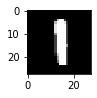

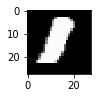

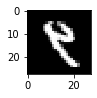

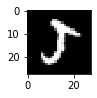

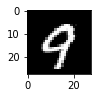

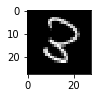

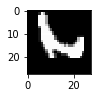

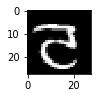

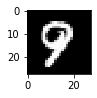

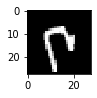

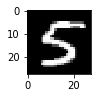

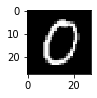

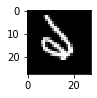

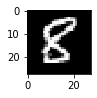

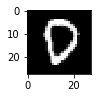

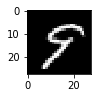

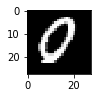

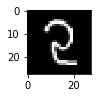

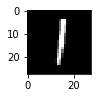

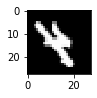

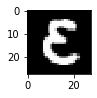

KeyboardInterrupt: 

In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
# 이미지 백색화 => noise 제거 (변수 간 상관도를 없앰)
#datagen = ImageDataGenerator(zca_whitening=True)
#datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                    save_to_dir='images', save_prefix='aug', save_format='png'):
    # augment
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(X_batch[i].reshape(28,28),
                     cmap=pyplot.get_cmap('gray'))
        pyplot.show()

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


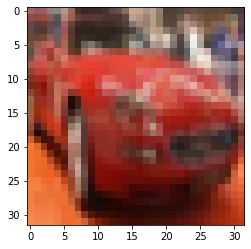

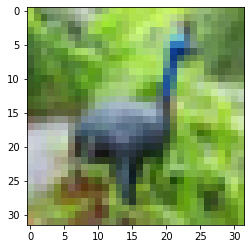

In [6]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [9]:
img_channels = 3
img_rows = 32
img_cols = 32
batch_size = 128
nb_epoch = 40
nb_classes = 10 
verbose = 1
validation_split = 0.2
optim = RMSprop()

# residual망의 영향
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(img_rows, img_cols, img_channels)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
______________________

C:\Users\ICT01_13\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [10]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
                   validation_split=validation_split, verbose=verbose)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/40





40000/40000 [==============================] - 12s 303us/step - loss: 1.6991 - acc: 0.3898 - val_loss: 1.3181 - val_acc: 0.5241
Epoch 2/40
40000/40000 [==============================] - 9s 232us/step - loss: 1.2805 - acc: 0.5421 - val_loss: 1.2783 - val_acc: 0.5420
Epoch 3/40
40000/40000 [==============================] - 9s 230us/step - loss: 1.0841 - acc: 0.6184 - val_loss: 0.9908 - val_acc: 0.6549
Epoch 4/40
40000/40000 [==============================] - 9s 229us/step - loss: 0.9520 - acc: 0.6676 - val_loss: 0.8863 - val_acc: 0.6936
Epoch 5/40
40000/40000 [==============================] - 9s 237us/step - loss: 0.8693 - acc: 0.7005 - val_loss: 0.8531 - val_acc: 0.7027
Epoch 6/40
40000/40000 [==============================] - 9s 229us/step - loss: 0.7964 - acc: 0.7238 - val_loss: 0.7861 - val_acc: 0.7258
Epoch 7/40
40000/40

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False, rotation_range=0,
                            width_shift_range=0.1, height_shift_range=0.1,
                            horizontal_flip=True, vertical_flip=False)
datagen.fit(X_train)

In [14]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size,
                                 samples_per_epoch=X_train.shape[0],
                                nb_epoch=nb_epoch, verbose=verbose))

TypeError: flow() got an unexpected keyword argument 'samples_per_epoch'

In [ ]:
# https://rfriend.tistory.com/422
# 업그레이드하래서 다 했는데... 낑

In [55]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=verbose)
print("\nTest score: ", score[0])
print("\nTest accuracy: ", score[1])

10000/10000 [==============================] - 5s 523us/step

Test score:  1.0107006141662598

Test accuracy:  0.7799999713897705


In [ ]:
# json
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5').overwrite=True)

In [ ]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.jso.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print("loaded model from disk")

In [ ]:
# accuracy graph를 출력
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 이미지 cat, dog을 다운로드한 다음 위의 모델로 예측해보시오.
https://github.com/GRuuuuu/GRuuuuu.github.io/blob/master/assets/resources/machine-learning/CNN-CIFAR10/cifar10%20dropout%20test%20notebook-s.ipynb

In [4]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_names), (32, 32)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) / 255
predictions =model.predict_classes(imgs)
print(predictions)

OSError: Cannot understand given URI: ['cat.jpg', 'dog.jpg'].

In [ ]:
프로젝트
웹이랑 연결. (이미지 업로드 가능하도록) >> 모델에 돌려서 >> 뭔가를 또 웹으로 출력해서 보여주도록
텔레그램 이용해서 서비스할 수도 있음

# 전이학습 (transfer learning) Application
- 반지도학습 (일부데이터의 라벨이 없음) : knn, tranductive SVM
https://calculatedcontent.com/2014/09/23/machine-learning-with-missing-labels-transductive-svms/
- 가중치 활용 : 그대로 적용
- 가중치 중 일부만 활용
- FFNN 부분만 학습해서 사용

# pre-trained, fine-tuning (FFNN부분만 domain knowledge)

PLT image size (224, 224)


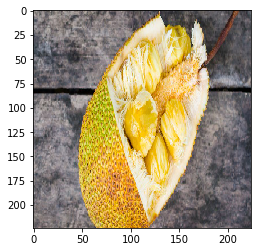

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)















UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1/convolution}}]]
	 [[fc1000/Softmax/_2349]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1/convolution}}]]
0 successful operations.
0 derived errors ignored.

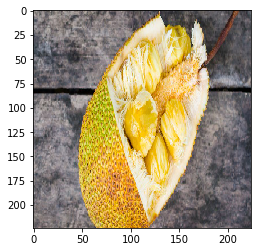

In [3]:
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'jackfruit.jpg'
original = load_img(filename, target_size=(224, 224))
print('PLT image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size', numpy_image.shape)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
#prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
# dense을 이용해서 모델을 생성
# 라벨 => 확률
resnet_model = resnet50.ResNet50(weights='imagenet')
predictions = resnet_model.predict(processed_image)[:4]
label = decode_predictions(predictions)
print(label)

In [17]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import glob
from matplotlib.image import imread
from keras.preprocessing import image
#tf.enable_eager_execution()
#assert tf.executing_eagerly()
autotune = tf.data.experimental.AUTOTUNE
data_dir = "C:\\Users\\ICT01_13\\Desktop\\kkyul\\전달\\flowers\\flower_photos"
data_dir = pathlib.Path(data_dir)
label_names = {'daisy':0, 'dandelion':1, 'roses':2,
              'sunflowers':3, 'tulips':4}
label_key = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [18]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split = (int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
img_size = 160
batch_size = 32

In [19]:
def _parse_data(x, y):
    image = tf.read_file(x)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)
    image = (image / 127.5)
    image = tf.image.resize(image, (img_size, img_size))
    return image, y

def _input_fn(x, y):
    # 기본단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x, y))
    ds = ds.map(_parse_data) # 함수 적용
    # buffer 거쳐가는 기억공간
    ds = ds.shuffle(buffer_size = data_size) # 충분한 공간확보
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size = autotune)
    return ds

train_ds = _input_fn(x_train, y_train)
validation_ds = _input_fn(x_test, y_test)

In [23]:
img_shape = (img_size, img_size, 3)
# include_top=False인 경우는 input_shape=img_shape을 지정
# convolution에 대한 가중치 학습이 없음
vgg16_model = tf.keras.applications.VGG16(input_shape=img_shape,
                                         include_top=False, weights='imagenet')
# flatten이 없음
vgg16_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # flatten을 대신함 : 모양을 유지한 채 플래튼
# ffnn의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax')

model = tf.keras.Sequential([
    vgg16_model,
    global_average_layer,
    prediction_layer
])

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

history = model.fit(train_ds, epochs=100, steps_per_epoch=2)

Train on 2 steps
Epoch 1/100


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: {{function_node __inference_Dataset_map__parse_data_8376}} Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_3]]
  (1) Invalid argument: {{function_node __inference_Dataset_map__parse_data_8376}} Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_3]]
	 [[IteratorGetNext_3/_587]]
0 successful operations.
0 derived errors ignored.

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

NameError: name 'history' is not defined

In [ ]:
# GAN articles
https://towardsdatascience.com/gangogh-creating-art-with-gans-8d087d8f74a1
https://machinelearningmastery.com/what-is-cyclegan/    